In [36]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

Defining the function to build a Linear Regression Model

In [37]:
def build_linear_reg_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    
    # Sequential: Most simple model, contains one or more layers
    linear_reg_model = tf.keras.models.Sequential()

    # Linear reg model has one node in a single layer. Dense() is used to create a fully-connected neuron layer
    linear_reg_model.add(tf.keras.layers.Dense(units=1, input_shape=(1,))) # units: number of neurons; input_shape: dimension of input data

    # compile to TF optimized code and config training to minimize MSE
    linear_reg_model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return linear_reg_model


Defining the function to train the model

In [38]:
def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # fit is the method used to train a model (contains the Training Loop)
    history = model.fit(x=feature,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)
    
    trained_weights = model.get_weights()[0][0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    # gather a snapshot of each epoch
    hist = pd.DataFrame(history.history)

    # gather the MSE of each epoch
    rmse = hist["root_mean_squared_error"]

    return trained_weights, trained_bias, epochs, rmse

Defining functions to visualize the model training

In [39]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label, label="Examples")

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r', label="Model")

  # add legend
  plt.legend()

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

Defining the dataset

The dataset consist of 12 synthetic examples. Each example consists of one feature and one label.

In [40]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Specifying hyperparameters and calling build and train functions

Epoch 1/10
1/1 [==============================] - 0s 266ms/step - loss: 772.6962 - root_mean_squared_error: 27.7974
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 758.2604 - root_mean_squared_error: 27.5365
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 747.9194 - root_mean_squared_error: 27.3481
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 739.3386 - root_mean_squared_error: 27.1908
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 731.7781 - root_mean_squared_error: 27.0514
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 724.8955 - root_mean_squared_error: 26.9239
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 718.4998 - root_mean_squared_error: 26.8048
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 712.4724 - root_mean_squared_error: 26.6922
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 706.7339 - root_

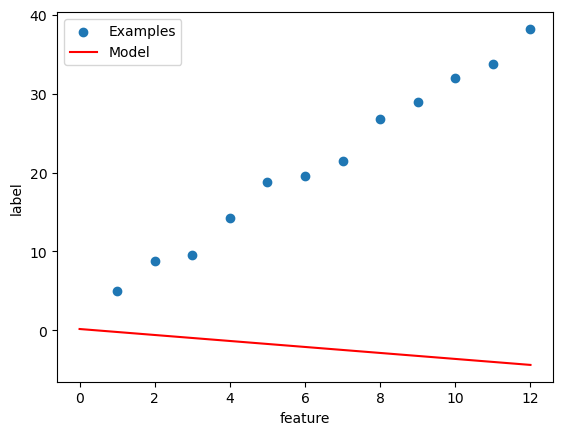

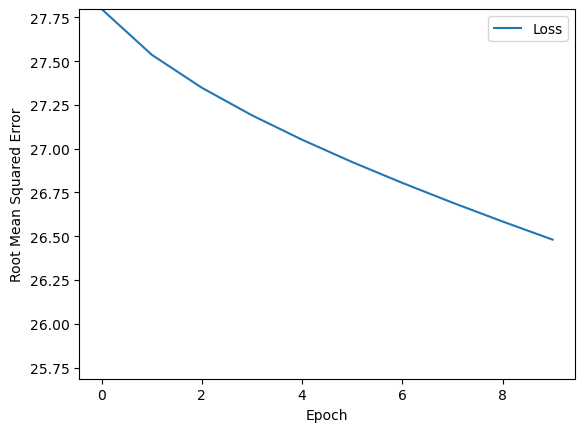

In [41]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_linear_reg_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)

plot_the_loss_curve(epochs, rmse)

Note that, if the training was succeed, the red line should align with the blue dots on the first graph.

But it doesn't align.


Look at the second graph and notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

So one solution is increase the number of epochs until the training converge (i.e, the loss slope becamme nearly zero).

# Increasing the number of epochs

Epoch 1/80
1/1 [==============================] - 0s 270ms/step - loss: 227.5778 - root_mean_squared_error: 15.0857
Epoch 2/80
1/1 [==============================] - 0s 3ms/step - loss: 219.7843 - root_mean_squared_error: 14.8251
Epoch 3/80
1/1 [==============================] - 0s 3ms/step - loss: 214.2617 - root_mean_squared_error: 14.6377
Epoch 4/80
1/1 [==============================] - 0s 3ms/step - loss: 209.7148 - root_mean_squared_error: 14.4815
Epoch 5/80
1/1 [==============================] - 0s 3ms/step - loss: 205.7348 - root_mean_squared_error: 14.3435
Epoch 6/80
1/1 [==============================] - 0s 4ms/step - loss: 202.1326 - root_mean_squared_error: 14.2173
Epoch 7/80
1/1 [==============================] - 0s 3ms/step - loss: 198.8030 - root_mean_squared_error: 14.0998
Epoch 8/80
1/1 [==============================] - 0s 3ms/step - loss: 195.6809 - root_mean_squared_error: 13.9886
Epoch 9/80
1/1 [==============================] - 0s 3ms/step - loss: 192.7225 - root_

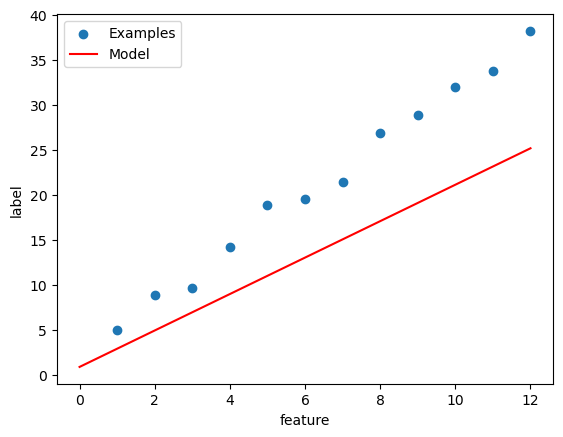

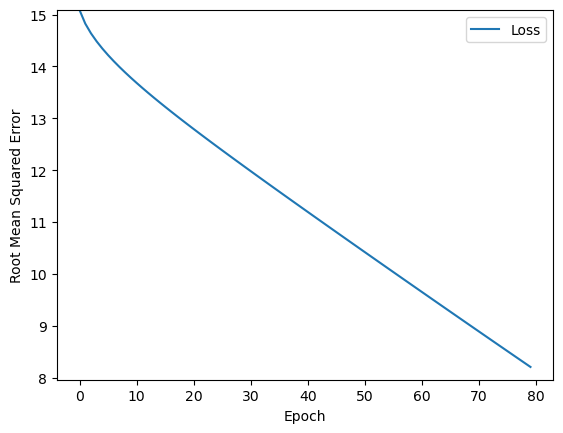

In [57]:
learning_rate=0.01
epochs=80
my_batch_size=12

my_model = build_linear_reg_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)

plot_the_loss_curve(epochs, rmse)

The model is a lot better, but notice that the training has not converge yet.

Let's continue increasing the number of epochs:

Epoch 1/450
1/1 [==============================] - 0s 278ms/step - loss: 303.0691 - root_mean_squared_error: 17.4089
Epoch 2/450
1/1 [==============================] - 0s 3ms/step - loss: 294.0599 - root_mean_squared_error: 17.1482
Epoch 3/450
1/1 [==============================] - 0s 3ms/step - loss: 287.6555 - root_mean_squared_error: 16.9604
Epoch 4/450
1/1 [==============================] - 0s 3ms/step - loss: 282.3704 - root_mean_squared_error: 16.8039
Epoch 5/450
1/1 [==============================] - 0s 3ms/step - loss: 277.7353 - root_mean_squared_error: 16.6654
Epoch 6/450
1/1 [==============================] - 0s 3ms/step - loss: 273.5330 - root_mean_squared_error: 16.5388
Epoch 7/450
1/1 [==============================] - 0s 3ms/step - loss: 269.6426 - root_mean_squared_error: 16.4208
Epoch 8/450
1/1 [==============================] - 0s 3ms/step - loss: 265.9890 - root_mean_squared_error: 16.3092
Epoch 9/450
1/1 [==============================] - 0s 2ms/step - loss: 262.522

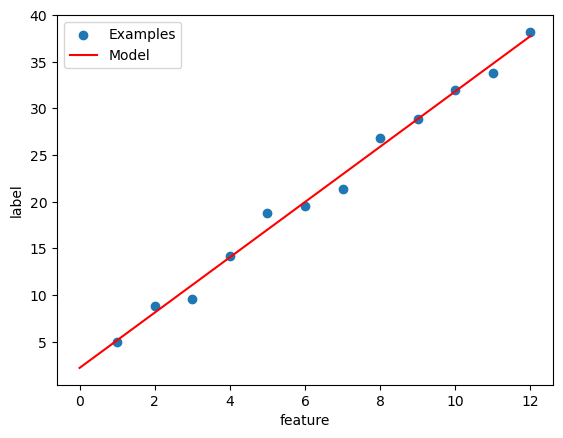

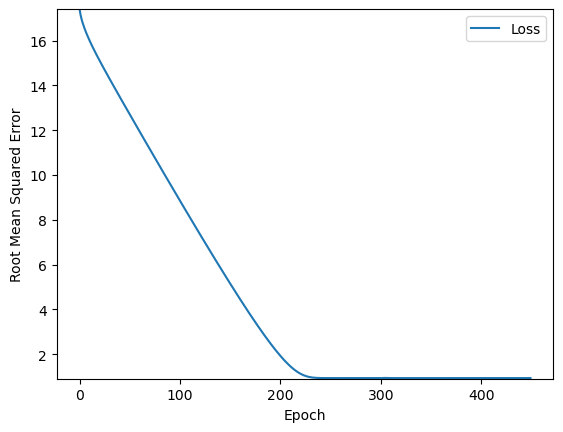

In [58]:
learning_rate=0.01
epochs=450
my_batch_size=12

my_model = build_linear_reg_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)

plot_the_loss_curve(epochs, rmse)

# Increasing the Learning Rate

In order to accelerate the model convergency, we can increase the learning rate. But be aware that a too high learning rate can make the model diverge (the next point on the gradient descent could perpetually bounce across the bottom of the loss function)

Let's set a too high learning rate do see what happens:

Epoch 1/450
1/1 [==============================] - 0s 265ms/step - loss: 566.0652 - root_mean_squared_error: 23.7921
Epoch 2/450
1/1 [==============================] - 0s 3ms/step - loss: 6693105.5000 - root_mean_squared_error: 2587.1038
Epoch 3/450
1/1 [==============================] - 0s 4ms/step - loss: 561.3469 - root_mean_squared_error: 23.6928
Epoch 4/450
1/1 [==============================] - 0s 3ms/step - loss: 3.2498 - root_mean_squared_error: 1.8027
Epoch 5/450
1/1 [==============================] - 0s 3ms/step - loss: 1.0044 - root_mean_squared_error: 1.0022
Epoch 6/450
1/1 [==============================] - 0s 3ms/step - loss: 0.9663 - root_mean_squared_error: 0.9830
Epoch 7/450
1/1 [==============================] - 0s 3ms/step - loss: 0.9595 - root_mean_squared_error: 0.9795
Epoch 8/450
1/1 [==============================] - 0s 3ms/step - loss: 0.9537 - root_mean_squared_error: 0.9766
Epoch 9/450
1/1 [==============================] - 0s 3ms/step - loss: 0.9481 - root_me

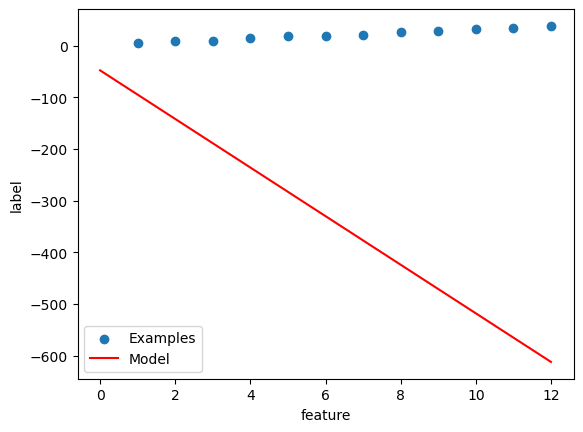

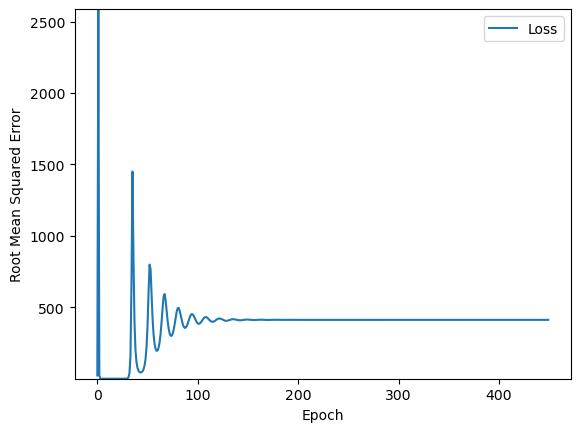

In [59]:
learning_rate=100
epochs=450
my_batch_size=12

my_model = build_linear_reg_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)

plot_the_loss_curve(epochs, rmse)

# Finding the ideal combination of number of epochs and learning rate

Epoch 1/65
1/1 [==============================] - 0s 266ms/step - loss: 960.7809 - root_mean_squared_error: 30.9965
Epoch 2/65
1/1 [==============================] - 0s 4ms/step - loss: 747.7110 - root_mean_squared_error: 27.3443
Epoch 3/65
1/1 [==============================] - 0s 3ms/step - loss: 617.9244 - root_mean_squared_error: 24.8581
Epoch 4/65
1/1 [==============================] - 0s 3ms/step - loss: 522.7396 - root_mean_squared_error: 22.8635
Epoch 5/65
1/1 [==============================] - 0s 4ms/step - loss: 447.5471 - root_mean_squared_error: 21.1553
Epoch 6/65
1/1 [==============================] - 0s 3ms/step - loss: 385.7428 - root_mean_squared_error: 19.6403
Epoch 7/65
1/1 [==============================] - 0s 5ms/step - loss: 333.7010 - root_mean_squared_error: 18.2675
Epoch 8/65
1/1 [==============================] - 0s 3ms/step - loss: 289.1849 - root_mean_squared_error: 17.0054
Epoch 9/65
1/1 [==============================] - 0s 3ms/step - loss: 250.7014 - root_

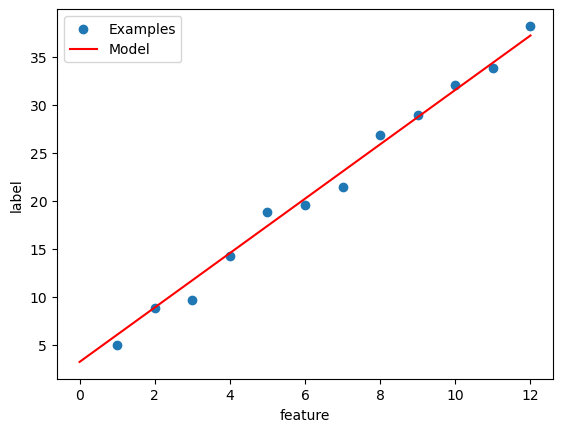

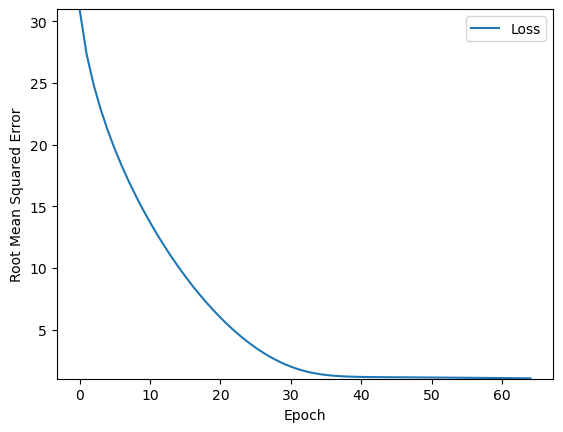

In [75]:
learning_rate=0.14
epochs=65
my_batch_size=12

my_model = build_linear_reg_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)

plot_the_loss_curve(epochs, rmse)

# Adjusting the Batch Size

The system recalculates the model's loss value and adjusts the model's weights and bias after each iteration. Each iteration is the span in which the system processes one batch. For example, if the batch size is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with batch_size in the following code cell. What's the smallest integer you can set for batch_size and still have the model converge in a hundred epochs? 

Epoch 1/65
12/12 [==============================] - 0s 818us/step - loss: 572.9014 - root_mean_squared_error: 23.9354
Epoch 2/65
12/12 [==============================] - 0s 818us/step - loss: 163.3676 - root_mean_squared_error: 12.7815
Epoch 3/65
12/12 [==============================] - 0s 818us/step - loss: 39.0721 - root_mean_squared_error: 6.2508
Epoch 4/65
12/12 [==============================] - 0s 818us/step - loss: 5.5453 - root_mean_squared_error: 2.3548
Epoch 5/65
12/12 [==============================] - 0s 818us/step - loss: 1.9143 - root_mean_squared_error: 1.3836
Epoch 6/65
12/12 [==============================] - 0s 909us/step - loss: 1.7630 - root_mean_squared_error: 1.3278
Epoch 7/65
12/12 [==============================] - 0s 909us/step - loss: 2.1231 - root_mean_squared_error: 1.4571
Epoch 8/65
12/12 [==============================] - 0s 818us/step - loss: 1.9857 - root_mean_squared_error: 1.4092
Epoch 9/65
12/12 [==============================] - 0s 909us/step - loss:

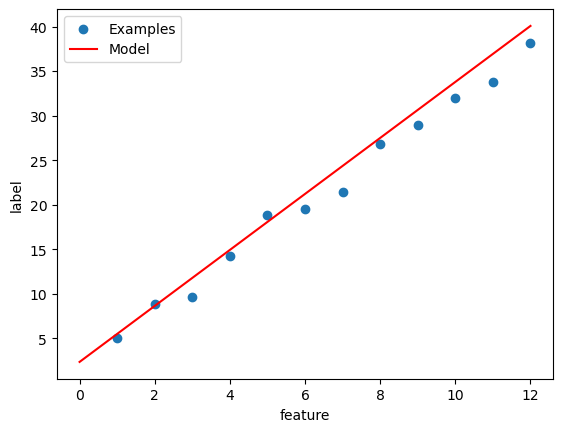

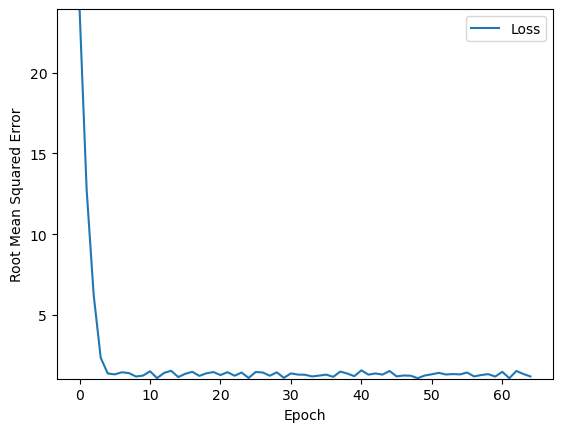

In [77]:
learning_rate=0.14
epochs=65
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_linear_reg_model(learning_rate)

trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)

plot_the_loss_curve(epochs, rmse)

# Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.